In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

print("Feature names:", wine.feature_names)
print("Target classes:", wine.target_names)

# Show first 5 rows
X.head()


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
X.shape

(178, 13)

In [4]:
# Basic info
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
# Summary statistics
print(X.describe())


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [6]:
# Check class distribution
print(y.value_counts())
print('\n')


target
1    71
0    59
2    48
Name: count, dtype: int64




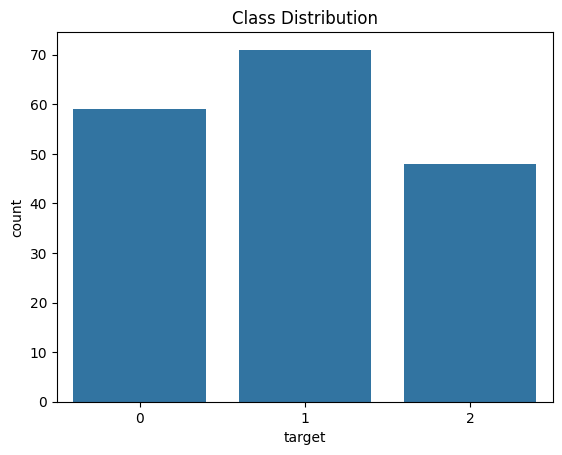

In [7]:
# Plot class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()


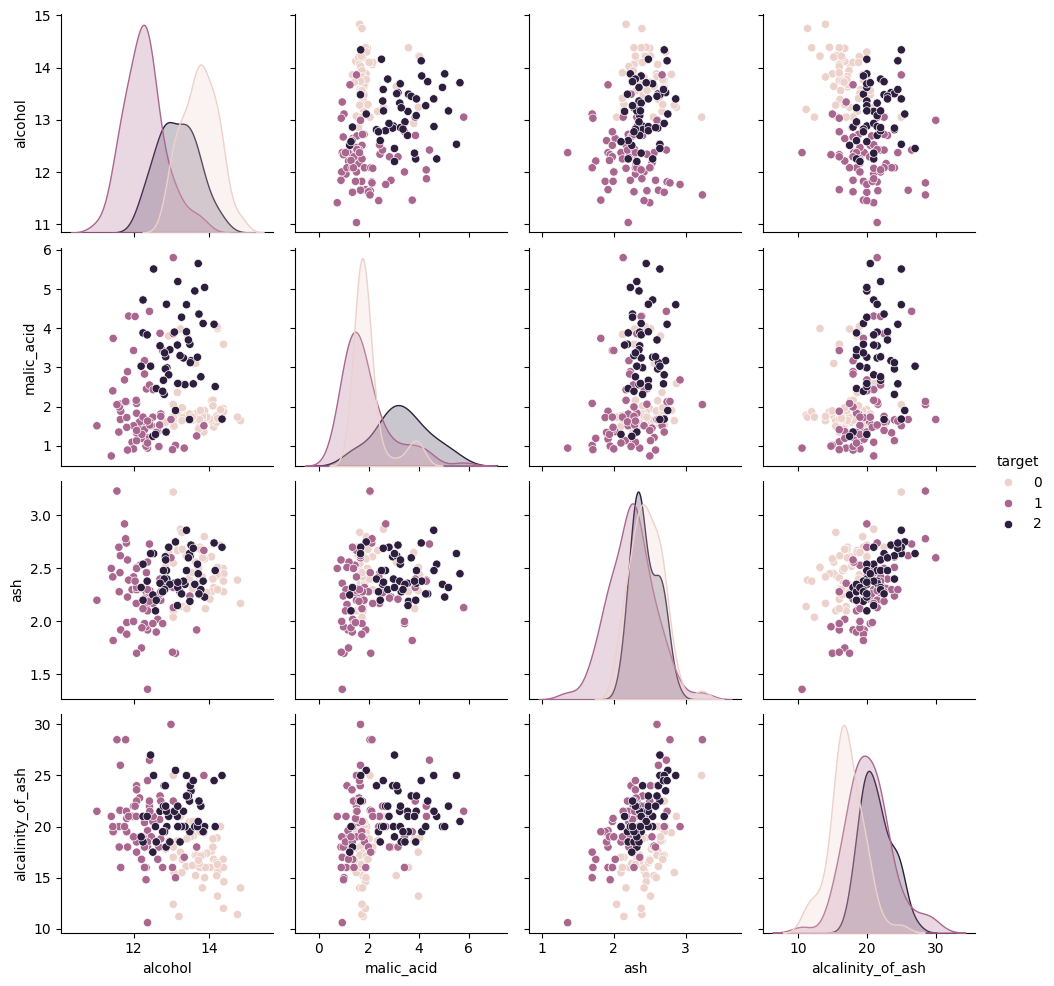

In [8]:
# Pairplot for first few features to see distribution by class
sns.pairplot(pd.concat([X.iloc[:, :4], y], axis=1), hue='target')
plt.show()


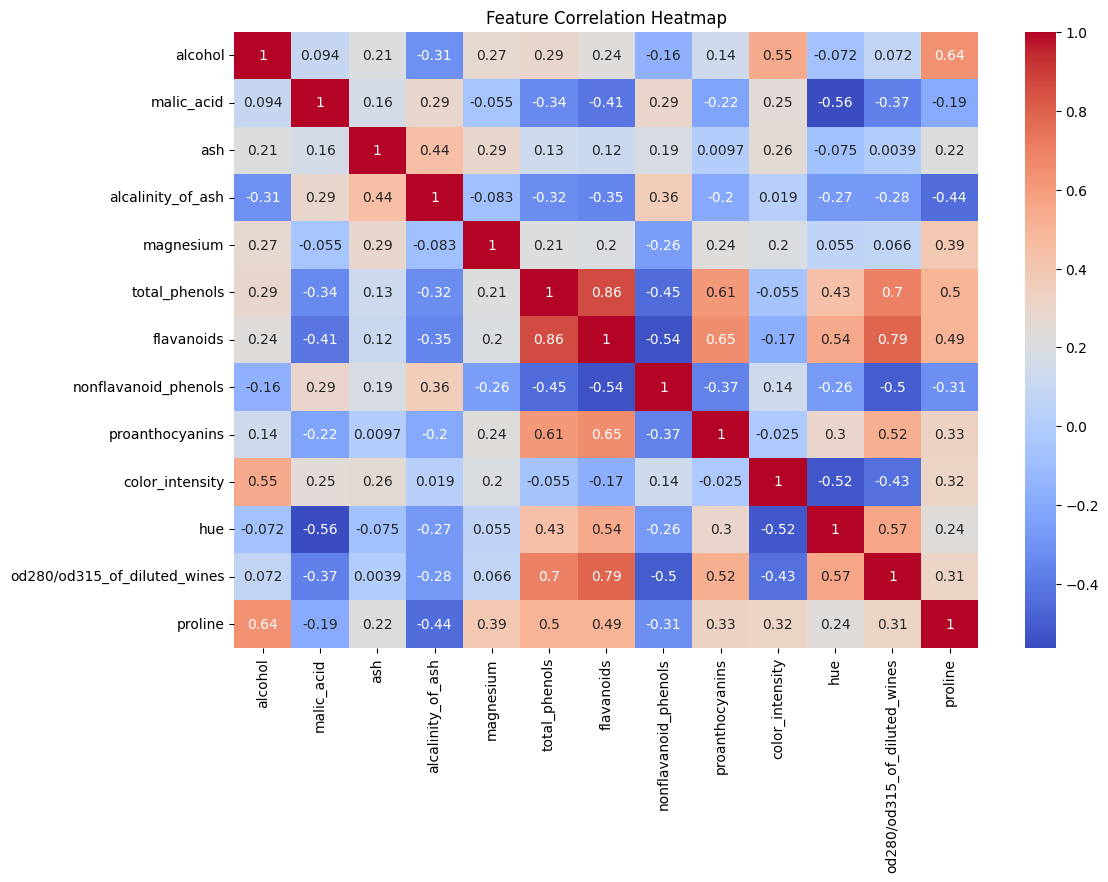

In [9]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**Inference from the Correlation Heatmap:**

Based on the heatmap, we can observe the following correlations between the features:

*   **Strong Positive Correlations:**
    *   `flavanoids` and `total_phenols`: These two features are highly positively correlated, suggesting that wines with higher levels of total phenols also tend to have higher levels of flavanoids.
    *   `od280/od315_of_diluted_wines` and `flavanoids`: There is a strong positive correlation between these two features.
    *   `proline` and `color_intensity`: These features show a moderate positive correlation.

*   **Strong Negative Correlations:**
    *   `alcalinity_of_ash` and `alcohol`: There is a notable negative correlation, indicating that as the alcohol content increases, the alkalinity of the ash tends to decrease.
    *   `flavanoids` and `color_intensity`: These features have a strong negative correlation.

*   **Other Notable Correlations:**
    *   `malic_acid` has weak correlations with most other features.
    *   `ash` and `alcalinity_of_ash` show a moderate positive correlation.
    *   `magnesium` has relatively weak correlations with most features, except for a moderate positive correlation with `alcalinity_of_ash`.

Understanding these correlations can be helpful in feature selection and model building. For example, highly correlated features might provide redundant information, and one of them could potentially be removed without significantly impacting model performance.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [12]:
y_pred = model.predict(X_test)


Accuracy: 0.9722222222222222

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



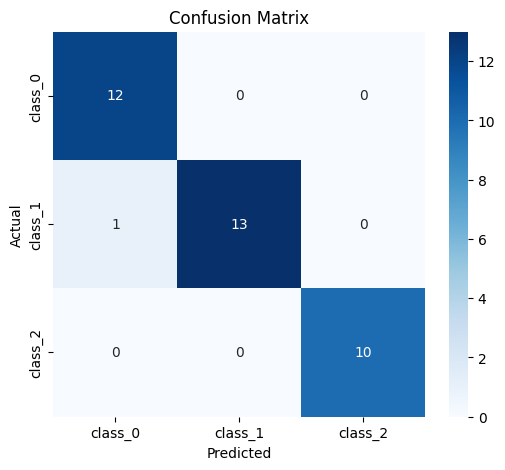

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=wine.target_names, yticklabels=wine.target_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
